### Sahil Bavishi
### Excercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1: Write a user defined function ‘myFnLinReg(x,y)’to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [2]:
def myFnLinReg(x, y):
    theta = np.ones((2,1))
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    theta_num= ((x - x_mean) * (y - y_mean)).sum()
    theta_den = ((x - x_mean)**2).sum()
    theta[1] = theta_num / theta_den
    theta[0] = y_mean - (theta[1] * x_mean)
    return theta

### Q2: Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70, 30). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [3]:
df = pd.read_csv('mtcars.csv')
new_df = df.sample(frac=0.7)
new_df2 = df.drop(new_df.index)
x = df['wt']
y = df['mpg']
x_train = new_df['wt']
y_train = new_df['mpg']
x_test = new_df2['wt']
y_test = new_df2['mpg']
theta = myFnLinReg(x_train, y_train)

### Q3: What is the mpg of a car, whose weight is 6.7? 

In [4]:
[1, 6.7] @ theta
print([1, 6.7] @ theta, ' is the mpg')

[1.24403664]  is the mpg


### Q4)Compute and print accuracy measures such as RMSE and R2 for the test set.

In [5]:
def corr_coef(x_test, y_test, m, c):
    y_pred = c + m * x_test
    SSE = np.subtract(np.array(y_test), np.array(y_pred)) ** 2
    SSE = SSE.sum()
    SST = np.subtract(np.array(y_test), y_test.mean()) ** 2
    SST = SST.sum()
    R = 1 - (SSE/SST)
    return R

In [6]:
def rmse(x_test, y_test, m, c):
    rmse = 0
    n = len(x_test)
    y_pred=  c + m* x_test
    rmse = np.subtract(np.array(y_pred), np.array(y_test))**2
    rmse = rmse.sum()
    rmse = np.sqrt(rmse/n)
    return rmse

In [7]:
rsme = rmse(x_test, y_test, theta[1], theta[0])
print('Root mean square error is ', rsme)
R = corr_coef(x_test, y_test, theta[1] , theta[0])
print('Correlation coefficient: ', R)

Root mean square error is  3.016991723068627
Correlation coefficient:  0.6221083220728028


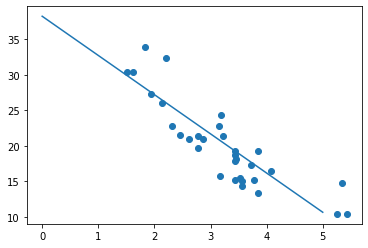

In [8]:
plt.scatter(x,y)
a = [x for x in np.arange(0,6)]
b = theta[1] * np.array(a) + theta[0]
plt.plot(a,b)
plt.show()

### Q5: Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

### BATCH GRADIENT DESCENT

In [9]:
X1 = np.array(x_train.values)
y = np.array(y_train.values)
X1 = X1.reshape([X1.size, 1])
x = np.hstack([np.ones((X1[:,0].size, 1)), X1])

In [10]:
def gradientDescent(x, y):
    theta2 = np.zeros((2,1))
    temp = np.zeros((2,1))
    alpha = 0.000001
    iteration = 1000000
    iters = np.ones((iteration,1))
    m = np.size(y)
    # gradient descend 
    J_history = np.zeros([iteration, 1])

    for iter in range(0, iteration):
        error = (x @ theta2) - y
        for j in range(0,2):
            temp[j] = theta2[j] - ((alpha / m) * np.sum(error @ x[:, j]))
        theta2 = temp
        J_history[iter] = (1 / (2 * m)) * (np.sum(((x @ theta2) - y) ** 2))
        iters[iter] = iter
    return theta2, J_history, iters

In [11]:
theta2, loss, iters = gradientDescent(x, y)
theta2

array([[36.30328143],
       [-5.40478748]])

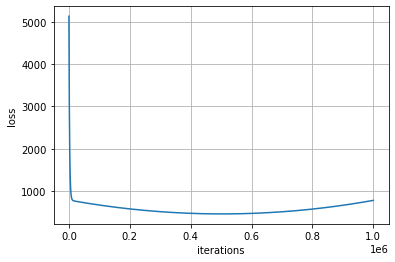

In [12]:
plt.plot(iters, loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.grid()
plt.show()

In [13]:
R = corr_coef(x_test, y_test, theta2[1] , theta2[0])
print('Correlation coefficient: ', R)

Correlation coefficient:  0.6894054101809015


The batch Gradient Descent provides a greater R-squared value than the one we got above through using the formula

### Stochastic Gradient Desent

In [35]:
import random
def gradientDescent(x, y):
    theta3 = theta2
    temp = np.zeros((2,1))
    alpha = 0.000001
    iteration = 200000
    iters = np.ones((iteration,1))
    m = np.size(y)
    # gradient descend 
    J_history = np.zeros([iteration, 1])

    for iter in range(0, iteration):
        r = random.randint(0,21)
        error = (x[r] @ theta3) - y
        for j in range(0,2):
            temp[j] = theta3[j] - ((alpha / m) * np.sum(error @ x[:, j]))
        theta3 = temp
        J_history[iter] = (1 / (2 * m)) * (np.sum(((x @ theta3) - y) ** 2))
        iters[iter] = iter
    return theta3, J_history, iters

In [36]:
theta3, loss, iters = gradientDescent(x, y)
theta3

array([[36.6179139],
       [-5.5029296]])

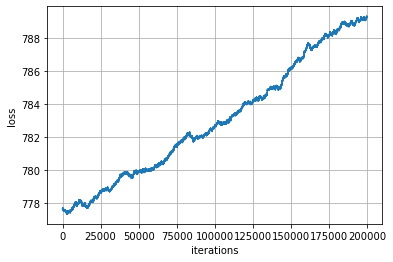

In [37]:
plt.plot(iters, loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.grid()
plt.show()

In [38]:
R = corr_coef(x_test, y_test, theta3[1] , theta3[0])
print('Correlation coefficient: ', R)

Correlation coefficient:  0.6845111322236997


There is an increase in the value of R-squared thereby enhancing the model, The value of the cost function looks like it's increasing however its within a range of 10 units which is negligible. 